In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import cg as sp_cg

In [2]:
npix=10
nsamp=100
pix =np.arange(nsamp).astype(float)*npix/nsamp

In [3]:
pix

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

The code you've provided is setting up a simple 1D case for a nearest neighbor pointing matrix. Here's a breakdown:

1. `npix=10`: This line is setting the number of pixels (`npix`) to 10. This represents the total number of pixels that the samples will be spread across.

2. `nsamp=100`: This line is setting the number of samples (`nsamp`) to 100. This represents the total number of samples that will be taken.

3. `pix =np.arange(nsamp).astype(float)*npix/nsamp`: This line is creating an array of sample points (`pix`). It does this by creating an array of integers from 0 to `nsamp-1`, converting those integers to floats, and then scaling the values so that they are spread uniformly across the `npix` pixels.

In this setup, each pixel will contain an average of `nsamp/npix` samples, which in this case is 10 samples per pixel. The samples are spread uniformly, so each pixel will contain approximately the same number of samples.

This setup could be used to simulate a situation where a detector is scanning across a field and taking samples at regular intervals. The nearest neighbor pointing matrix would then be used to assign each sample to the nearest pixel. The subpixel errors could be introduced by the fact that the samples are not necessarily located exactly at the center of the pixels.

In [4]:
P=np.zeros((nsamp,npix))
for i,p in enumerate(pix):
    P[i,int(np.round(pix[i])%npix)]=1

This Python code is creating a nearest neighbor pointing matrix `P`. Here's a breakdown:

1. `P=np.zeros((nsamp,npix))`: This line is initializing `P` as a 2D array with `nsamp` rows and `npix` columns, filled with zeros. Each row represents a sample and each column represents a pixel.

2. `for i,p in enumerate(pix):`: This line is starting a loop that will iterate over each element in the `pix` array. The `enumerate` function is used to get both the index (`i`) and the value (`p`) of each element.

3. `P[i,int(np.round(pix[i])%npix)]=1`: This line is doing a few things:
    - `np.round(pix[i])`: This is rounding the value of the `i`-th element in the `pix` array to the nearest integer. This represents the pixel that the `i`-th sample falls into.
    - `%npix`: This is taking the modulus of the pixel number by `npix`. This ensures that the pixel number wraps around to 0 if it's equal to `npix`, effectively creating a circular buffer of pixels.
    - `P[i,int(np.round(pix[i])%npix)]=1`: This is setting the value in the `i`-th row and `int(np.round(pix[i])%npix)`-th column of `P` to 1. This indicates that the `i`-th sample falls into the `int(np.round(pix[i])%npix)`-th pixel.

So, the result of this code is a pointing matrix `P` where each row has a single 1 in the column corresponding to the pixel that the sample falls into, and 0s elsewhere. This is a simple way to represent which pixel each sample is assigned to.

In [5]:
P

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 

In [6]:
freq = np.fft.rfftfreq(nsamp)
inv_ps=1/(1+(np.maximum(freq,freq[1]/2)/0.03)**-3.5)
F=np.zeros((nsamp,nsamp))
I=np.eye(nsamp)
for i in range(nsamp):
    F[:,i]=np.fft.irfft(inv_ps*np.fft.rfft(I[i]),n=nsamp)

In [7]:
inv_ps

array([0.00188647, 0.02093567, 0.19479834, 0.5       , 0.73241054,
       0.85666835, 0.9187897 , 0.95099295, 0.96871714, 0.97906433,
       0.985427  , 0.98951729, 0.99224806, 0.99413097, 0.99546578,
       0.99643505, 0.99715379, 0.99769669, 0.99811353, 0.99843826,
       0.99869457, 0.99889928, 0.99906451, 0.99919919, 0.99930994,
       0.99940176, 0.99947846, 0.99954296, 0.99959756, 0.99964406,
       0.99968387, 0.99971814, 0.99974777, 0.99977352, 0.99979599,
       0.99981567, 0.99983297, 0.99984824, 0.99986176, 0.99987378,
       0.99988448, 0.99989404, 0.99990261, 0.99991031, 0.99991724,
       0.9999235 , 0.99992917, 0.9999343 , 0.99993897, 0.99994322,
       0.99994709])

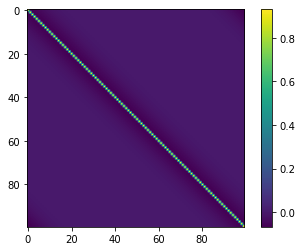

In [8]:
signal=np.sin(2*np.pi*pix/npix)
signal.shape
#plt.imshow(np.linalg.inv(F))
plt.imshow(F)
plt.colorbar()

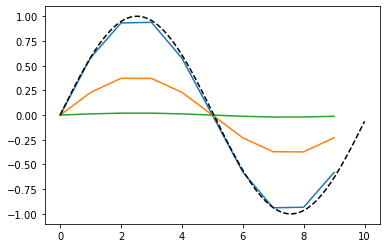

In [9]:
map_binned = np.linalg.solve((P.T.dot(P)), P.T.dot(signal))
map_ml = np.linalg.solve((P.T.dot(F).dot(P)),P.T.dot(F.dot(signal)))
map_fb = np.linalg.solve(P.T.dot(P), P.T.dot(F).dot(signal))
def dewin(x):
    return np.fft.irfft(np.fft.rfft(x) / np.sinc(freq),n=len(x)).real
plt.plot(np.arange(npix),map_binned)
plt.plot(np.arange(npix),map_ml)
plt.plot(np.arange(npix),map_fb)
signal=dewin(signal)
plt.plot(np.linspace(0,npix,nsamp),signal,c='k',ls='--')


## 2D Toy

In [10]:
import numpy as np, scipy, time
import cg
from pixell import utils, mpi
from scipy.sparse.linalg import cg, LinearOperator

A toy example for a single detector scanning at a constant speed across the sky (square patch).

In [11]:
nside = 100   # Number of pixels per side
nscan = nside*4 # Number of samples per row. 
npix  = nside**2 # Number of pixels in map
nsim  = 400   # Number of idk what


# Generate two scanning patterns
pix_pat1 = (np.mgrid[:nscan,:nscan]*nside/nscan).reshape(2,-1)
pix_pat2 = pix_pat1[::-1] # swap x and y for other pattern
pix      = np.concatenate([pix_pat1,pix_pat2],1)  # Combine the two patterns
nsamp    = pix.shape[1]

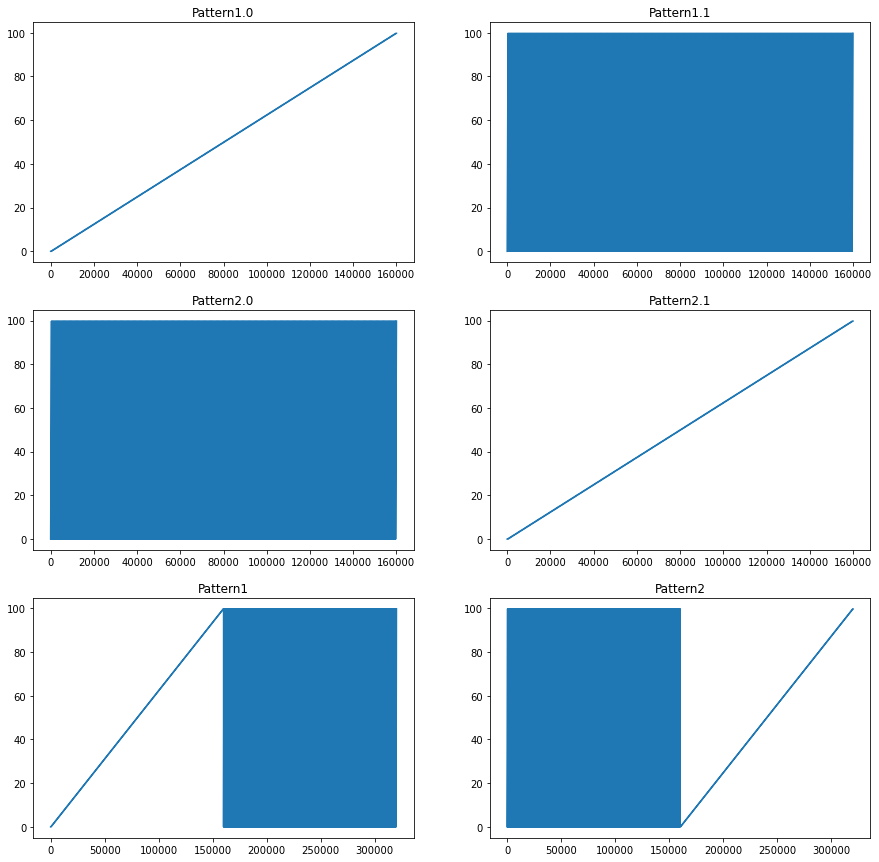

In [12]:
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

ax[0, 0].plot(np.arange(160000), pix_pat1[0])
ax[0, 0].set_title('Pattern1.0')

ax[0, 1].plot(np.arange(160000), pix_pat1[1])
ax[0, 1].set_title('Pattern1.1')

ax[1, 0].plot(np.arange(160000), pix_pat2[0])
ax[1, 0].set_title('Pattern2.0')

ax[1, 1].plot(np.arange(160000), pix_pat2[1])
ax[1, 1].set_title('Pattern2.1')

ax[2, 0].plot(np.arange(320000), pix[0])
ax[2, 0].set_title('Pattern1')

ax[2, 1].plot(np.arange(320000), pix[1])
ax[2, 1].set_title('Pattern2')

plt.show()


In [13]:
# Build a nearest neighbor sparse pointing matrix
iy, ix  = np.floor(pix+0.5).astype(int)%nside  # Nearest pixel
P_nn    = scipy.sparse.csr_array((np.full(nsamp,1),(np.arange(nsamp),iy*nside+ix)),shape=(nsamp,npix))

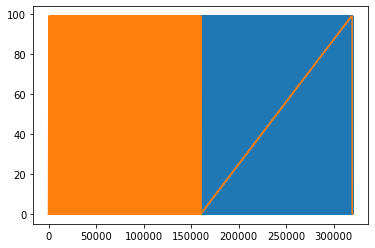

In [14]:
plt.plot(np.arange(len(iy)),iy)
plt.plot(np.arange(len(ix)),ix)

In [15]:
# Build a bilinear pointing matrix. Here a sample with coordinates
# y,x has value
# (1-ry)*(1-rx)*val[iy,ix] + (1-ry)*rx*val[iy,ix+1] + ry*(1-rx)*val[iy+1,ix] + ry*rx*val[iy+1,ix+1]
# where iy = floor(y) and ry = y-iy, etc.
# We want the pixel centers to be the control points for the interpolation.
# To get this we need floor(pix) instead of floor(pix+0.5)
#pix_left  = np.floor(pix+0.5).astype(int)
pix_left  = np.floor(pix).astype(int)
ry, rx    = pix-pix_left
iy1,ix1   = pix_left % nside
iy2,ix2   = (pix_left+1)% nside
P_lin     = scipy.sparse.csr_array((
	np.concatenate([(1-ry)*(1-rx), (1-ry)*rx, ry*(1-rx), ry*rx]),
	(np.tile(np.arange(nsamp),4),
		np.concatenate([iy1*nside+ix1, iy1*nside+ix2, iy2*nside+ix1, iy2*nside+ix2])
	)), shape=(nsamp,npix))
# load the linear interp tfun
freq_lin_1d, tfun_lin_1d = np.loadtxt("/vol/arc4/data1/asrivastava/model_error2/subpix/tfun_lin_1d.txt").T

In [16]:
# Build the inverse noise matrix. We want the noise to be pretty correlated, so
# let's have the fknee correspond to 1/30th of a side length. We can't
# afford to store the full thing, so just store the fourier-diagonal
fknee = 0.5*30/nscan
#fknee = 1
freq  = np.fft.rfftfreq(nsamp)
iN    = 1/(1+(np.maximum(freq,freq[1]/2)/fknee)**-3.5)

# Truncate the power law at a high but not extreme value. This is
# realistic and also avoids convergence problems for the destriper
iN    = np.maximum(iN, np.max(iN)*1e-8)
iNw   = 1
iNw_destripe = iNw * (1+1e-1)
iNc   = 1/(1/iN - 1/iNw_destripe)

In [17]:
fknee

0.0375

Text(0, 0.5, 'Inverse Noise')

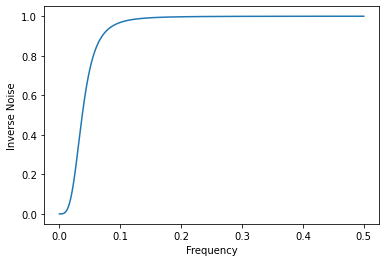

In [18]:
plt.plot(freq,iN)
plt.xlabel("Frequency")
plt.ylabel("Inverse Noise")

Text(0.5, 1.0, 'Fourier space')

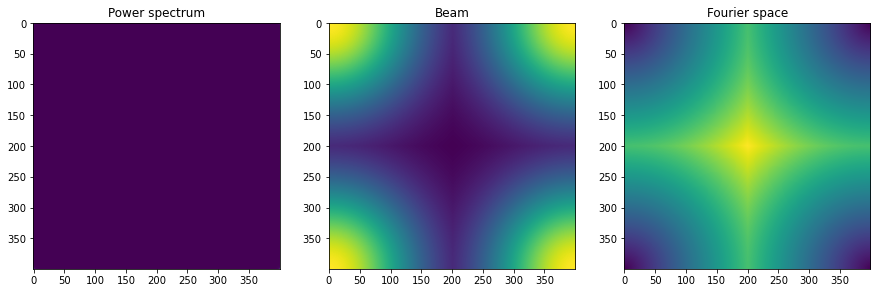

In [19]:
# Build the signal. It will be a simple 1/l**2 spectrum. We simulate this directly
# on the grid of the actual samples

def calc_l(n):
	ly = np.fft.fftfreq(n)[:,None]
	lx = np.fft.fftfreq(n)[None,:]
	l  = (ly**2+lx**2)**0.5
	return l


l      = calc_l(nscan)*nscan/nside # express in units of output pixels
lnorm  = 1
C      = (np.maximum(l,l[0,1]/2)/lnorm)**-2
# Make band-limited by applying a beam. nscan/nside translates from
# the target pixels to the sample spacing
bsigma = 1
B      = np.exp(-0.5*l**2*bsigma**2)

# plotting everything
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(C)
ax[0].set_title("Power spectrum")
ax[1].imshow(B)
ax[1].set_title("Beam")
ax[2].imshow(l)
ax[2].set_title("Fourier space")


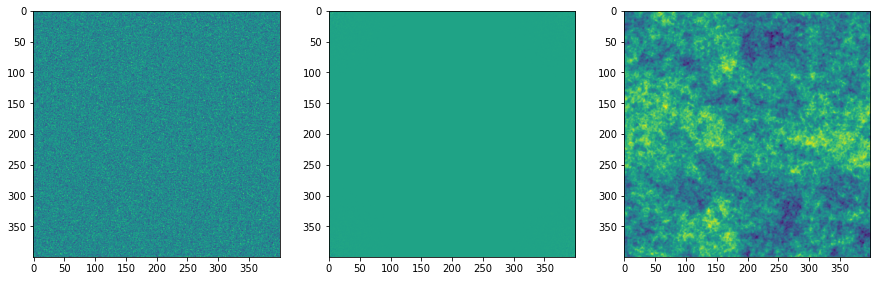

In [20]:
test_signal=np.random.normal(0, 1, (nscan, nscan))
fig,ax = plt.subplots(1,3,figsize=(15,5))

ax[0].imshow(test_signal)
ax[1].imshow(np.fft.fft2(test_signal).real*C**0.5*B)
ax[2].imshow(np.fft.ifft2(np.fft.fft2(test_signal)*C**0.5*B).real)

Text(0, 0.5, 'C_l')

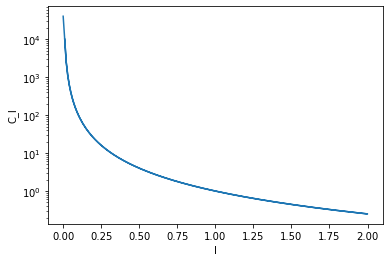

In [21]:
plt.semilogy(l[0],C[0])
plt.xlabel("l")
plt.ylabel("C_l")

In [22]:
def fmul(f,x):
	if np.asarray(f).size == 1: return f*x
	else: return np.fft.irfft(np.fft.rfft(x)*f,n=len(x)).real

def sim_signal(C, B, nscan):
	signal_map = np.fft.ifft2(np.fft.fft2(np.random.standard_normal((nscan,nscan)))*C**0.5*B).real
	#signal_map = np.fft.ifft2(np.fft.fft2(np.random.standard_normal((nside,nside)))*C**0.5*B).real
	signal = np.concatenate([signal_map.reshape(-1), signal_map.T.reshape(-1)])
	return signal, signal_map
def sim_noise(iN, nsamp):
	noise  = fmul(iN**-0.5, np.random.standard_normal(nsamp))
	return noise

In [23]:
# def mapmaker_ml(tod, P, iN):
# 	b = P.T.dot(fmul(iN,tod))
# 	def A(x): return P.T.dot(fmul(iN,P.dot(x)))
# 	solver = cg.CG(A, b)
# 	while solver.err > 1e-8: solver.step()
# 	return solver.x.reshape(nside,nside)

def mapmaker_ml(tod, P, iN):
    b = P.T.dot(fmul(iN, tod))

    def A(x):
        return P.T.dot(fmul(iN, P.dot(x)))

    # Ensuring that A and b are compatible with scipy.sparse.linalg.cg
    A_op = LinearOperator((len(b), len(b)), matvec=A)

    # Solve the linear system using SciPy's CG solver
    x, info = cg(A_op, b, tol=1e-8)

    if info > 0:
        print("Conjugate gradient solver did not converge.")

    return x.reshape(nside, nside)

def mapmaker_bin(tod, P):
	return scipy.sparse.linalg.spsolve(P.T.dot(P), P.T.dot(tod)).reshape(nside, nside)

def mapmaker_filter_bin(tod, P, F):
	return scipy.sparse.linalg.spsolve(P.T.dot(P), P.T.dot(fmul(F,tod))).reshape(nside, nside)



In [24]:
tod=sim_signal(C,B,nscan)[0]
map=sim_signal(C,B,nscan)[1]
noise=sim_noise(iN,nsamp)
map_ml=mapmaker_ml(tod,P_nn,iN)
noise_ml=mapmaker_ml(noise,P_nn,iN)
map_bin=mapmaker_bin(tod,P_nn)
map_noise_bin=mapmaker_bin(noise,P_nn)



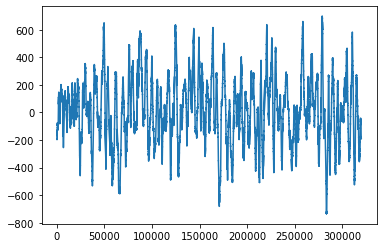

In [25]:
plt.plot(np.arange(nsamp),noise)

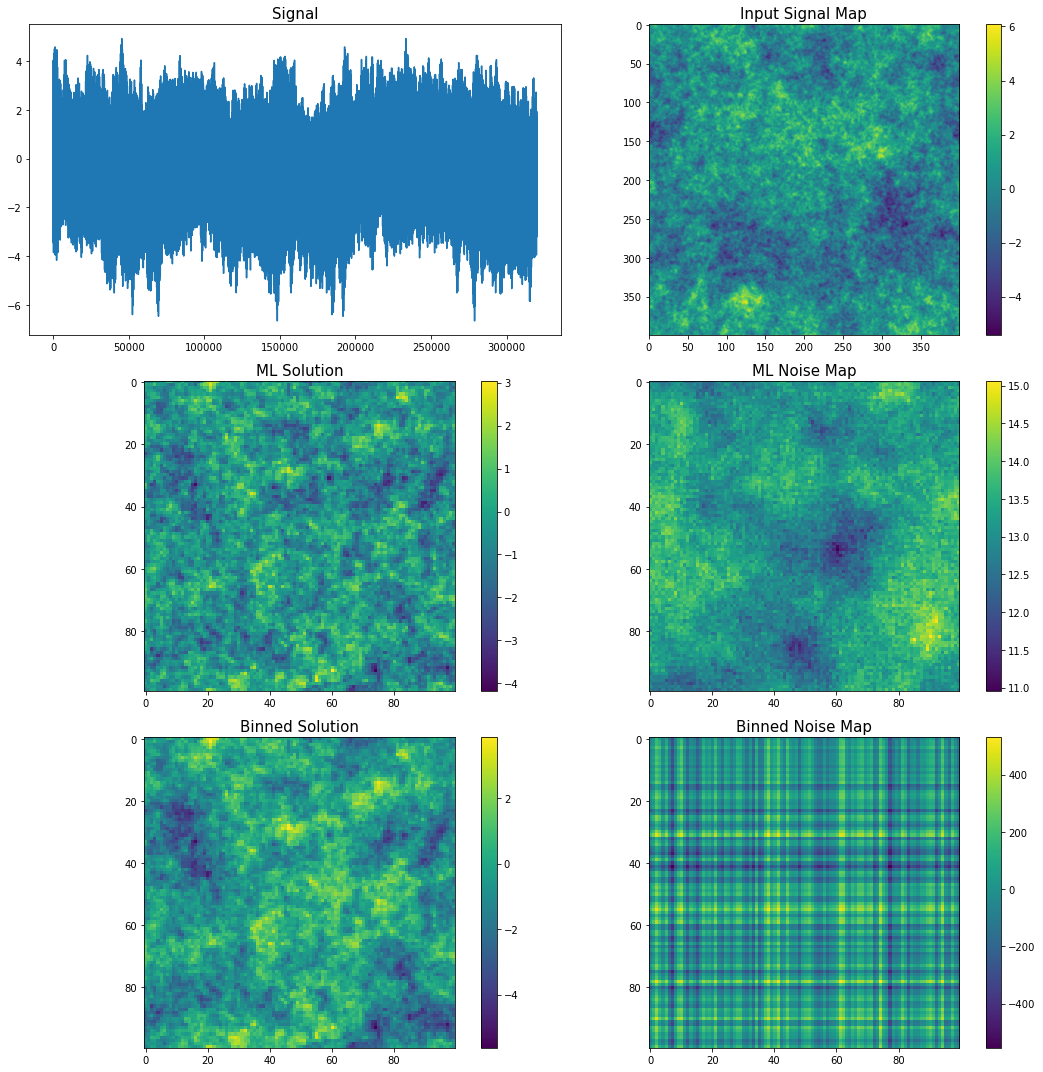

In [76]:
figure, ax = plt.subplots(3, 2, figsize=(15, 15))
ax[0,0].plot(np.arange(0, nsamp, 1), tod)
ax[0,0].set_title('Signal',fontsize=15)
ax[0,1].imshow(map,cmap='viridis')
ax[0,1].set_title('Input Signal Map',fontsize=15)
ax[1,0].imshow(map_ml,cmap='viridis')
ax[1,0].set_title('ML Solution',fontsize=15)
ax[1,1].imshow(noise_ml,cmap='viridis')
ax[1,1].set_title('ML Noise Map',fontsize=15)
ax[2,0].imshow(map_bin,cmap='viridis')
ax[2,0].set_title('Binned Solution',fontsize=15)
ax[2,1].imshow(map_noise_bin,cmap='viridis')
ax[2,1].set_title('Binned Noise Map',fontsize=15)
figure.colorbar(ax[0,1].imshow(map), ax=ax[0,1])
figure.colorbar(ax[1,0].imshow(map_ml), ax=ax[1,0])
figure.colorbar(ax[1,1].imshow(noise_ml), ax=ax[1,1])
figure.colorbar(ax[2,0].imshow(map_bin), ax=ax[2,0])
figure.colorbar(ax[2,1].imshow(map_noise_bin), ax=ax[2,1])
plt.tight_layout()

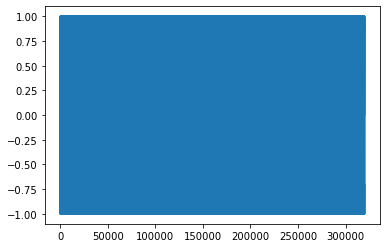

In [27]:
shape=np.arange(0,nsamp,1)
signal1=np.sin(45*shape*np.pi/180) 
plt.plot(shape,signal1)

In [28]:
from scipy.signal import welch
samp_fs, psd_s=scipy.signal.welch(signal1)
samp_fn, psd_n=scipy.signal.welch(noise)



0.125

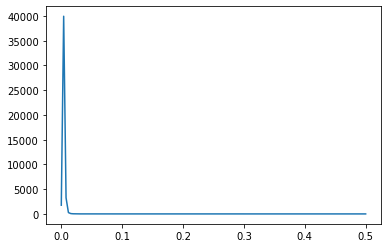

In [29]:
#plt.plot(samp_fs,psd_s)
plt.plot(samp_fn,psd_n)

samp_fs[np.argmax(psd_s)]

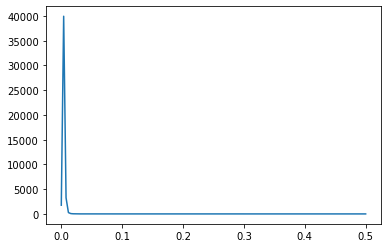

In [30]:
plt.plot(samp_fn,psd_n)

In [33]:
import numpy as np  # numerical routines
import matplotlib   # plotting libraries
import sys
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import astropy.io.fits as fits

## ipython notebook magic word to plot in the notebook
%matplotlib inline

## extra goody for controling colorbar
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

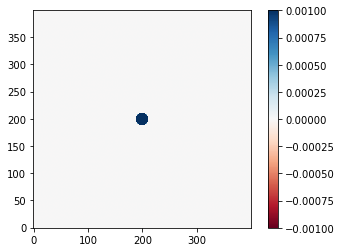

In [52]:
map_size = 5.*40.   # map size in arcminutes
pixel_size = 0.5     # pixel size in arcminutes
N = int(map_size/pixel_size)  # dimension of the map array

## make a 2D array of X and Y coordinates
X,Y = np.meshgrid(np.linspace(-1,1,N),np.linspace(-1,1,N))

## define the radial coordinate R of each pixel. R is real-space counterpart of fourier variable k
R = np.sqrt(X**2. + Y**2.) 

## create an ell-vector of arbitrary length
ell = np.arange(999, dtype=float)
 
A = 1.      # an arbitrary constant to normalize the power spectrum
ind = 0  # power-law index


## we have a power-law spectrum
Cl = A*(ell**ind)
## let us put the monopole and dipole terms explicitly to zero
Cl[0] = 0.
Cl[1] = 0.

## let's re-normalize this such that any power law will give similar amplitude at l=200
## as with the l^0 (flat) power spectrum (good for plot visibility)
Cl *= 1.0/Cl[199]


## we have to map the real-space vector R to Fourier-space vector ell
pix_to_rad = (pixel_size/60. * np.pi/180.)   # this is the pixel size in radians
ell_scale_factor = np.pi /pix_to_rad    # here we connect angular size to the multipoles
ell2d = R * ell_scale_factor     # this is the Fourier analog of the real-vector R in 2D

## The values in the array ell2d corresponds to the harmonic frequencies (recall l ~ 2pi/theta)
## we need an array that goes to this maximum number of multipoles (far exceeding our array dimension N)
## but most of the elemnts in this extended array will be zero!

Cl_expanded = np.zeros(int(ell2d.max())+1)
Cl_expanded[0:(Cl.size)] = Cl  # fill in the Cls until the max of the Cl vector
#print(Cl_expanded.shape)

## Now we need to extract the part of this array that corresponds to the values of ell2d (as integers).
## This is the 2D version of our 1D Cl power spectrum, whose dimensions are defined by 
## our choice of the pixel scale

Cl2d = Cl_expanded[ell2d.astype(int)]
#print(ell2d.astype(int).shape)


im = plt.imshow(Cl2d, interpolation='bilinear', origin='lower', cmap='RdBu')
im.set_clim(-0.001,0.001)
cbar = plt.colorbar()
plt.show()


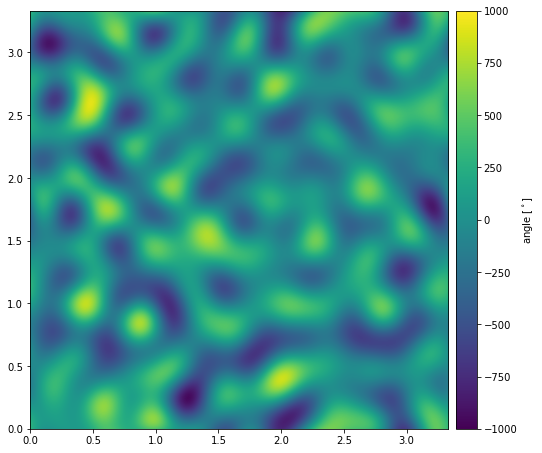

In [77]:
## We are creating a Gaussian random field, so our basis map will be an array of normally distributed random variables. 
## Onto this array we multiply with our 2D Cl array (square root of it)
## Note: If we have chosen Cl ~ l^0, then, of course, we will Fourier transform this random map.

random_map_array = np.random.normal(0,1,(N,N))
FT_random_array = np.fft.fft2(random_map_array)   # take FFT since Cl2D is in Fourier space 
    
FT_2d = np.sqrt(Cl2d) * FT_random_array     # we take the sqrt since the power spectrum is T^2
    

# now move back from the harmonic space to real space
map2d = np.fft.ifft2(np.fft.fftshift(FT_2d)) 

# rescaling map for change of variable of pixels to radians
map2d = map2d / pix_to_rad

# we only want to plot the real component
map2d = np.real(map2d)



## Plotting will require setting up the axis values according to the pixel size

im = plt.imshow(map2d, origin='lower', interpolation='bilinear')
im.set_clim(-1000,1000)
X_width = N*pixel_size/60.  # horizontal map width in degrees
Y_width = N*pixel_size/60.  # vertical map width in degrees

# plotting details
plt.gcf().set_size_inches(8,8)
ax=plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im, cax=cax)
im.set_extent([0,X_width,0,Y_width])
plt.ylabel('angle $[^\circ]$')
plt.xlabel('angle $[^\circ]$')
plt.show()

In [78]:
signal_test = np.concatenate([map2d.reshape(-1), map2d.T.reshape(-1)])
#plt.plot(np.arange(320000), signal_test)
test_map=mapmaker_ml(signal_test,P_nn,iN)


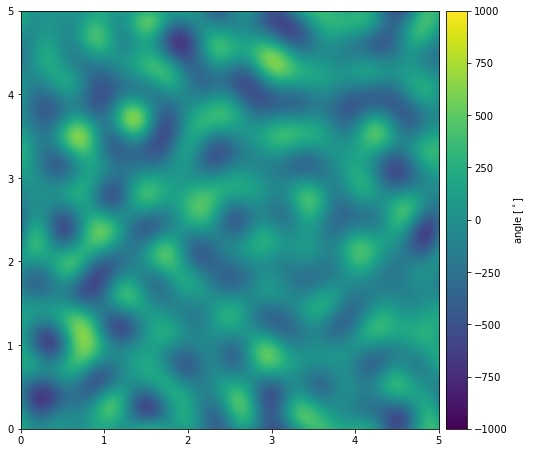

In [83]:
im = plt.imshow(test_map, interpolation='bilinear')
im.set_clim(-1000,1000)
X_width = N*pixel_size/40.  # horizontal map width in degrees
Y_width = N*pixel_size/40.  # vertical map width in degrees

# plotting details
plt.gcf().set_size_inches(8,8)
ax=plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im, cax=cax)
im.set_extent([0,X_width,0,Y_width])
plt.ylabel('angle $[^\circ]$')
plt.xlabel('angle $[^\circ]$')
plt.show()